In [17]:
# define libraries to use
import pandas as pd
import numpy as np
from pathlib import Path
import requests,json
import matplotlib.pyplot as plt
%matplotlib inline

# variables that need initialization

# NY state vehicle registrations
nydmvDf = None



In [18]:
nydmvDf = pd.read_csv("data/nydmv/nydmv.csv",encoding = "unicode_escape", low_memory=False)

# NYS DMV Data Verification

In [19]:
nydmvDf.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12586701 entries, 0 to 12586700
Data columns (total 20 columns):
 #   Column                Non-Null Count     Dtype  
---  ------                --------------     -----  
 0   Record Type           12586701 non-null  object 
 1   VIN                   12586515 non-null  object 
 2   Registration Class    12586701 non-null  object 
 3   City                  12586701 non-null  object 
 4   State                 12586701 non-null  object 
 5   Zip                   12586701 non-null  int64  
 6   County                12586701 non-null  object 
 7   Model Year            12586677 non-null  float64
 8   Make                  12586691 non-null  object 
 9   Body Type             12586701 non-null  object 
 10  Fuel Type             12567068 non-null  object 
 11  Unladen Weight        9695237 non-null   float64
 12  Maximum Gross Weight  2271426 non-null   float64
 13  Passengers            221924 non-null    float64
 14  Reg Valid Date  

In [20]:
nydmvDf = nydmvDf[nydmvDf["Record Type"] == "VEH"]
nydmvDf.drop(columns=["Record Type","Registration Class","Unladen Weight","Maximum Gross Weight","Passengers","Color","Scofflaw Indicator","Suspension Indicator","Revocation Indicator"],inplace=True)
nydmvDf.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11350911 entries, 2 to 12586700
Data columns (total 11 columns):
 #   Column               Non-Null Count     Dtype  
---  ------               --------------     -----  
 0   VIN                  11350905 non-null  object 
 1   City                 11350911 non-null  object 
 2   State                11350911 non-null  object 
 3   Zip                  11350911 non-null  int64  
 4   County               11350911 non-null  object 
 5   Model Year           11350911 non-null  float64
 6   Make                 11350909 non-null  object 
 7   Body Type            11350911 non-null  object 
 8   Fuel Type            11350911 non-null  object 
 9   Reg Valid Date       11350911 non-null  object 
 10  Reg Expiration Date  11155400 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 1.0+ GB


In [21]:
# Set categorical variables
nydmvDf["State"] = nydmvDf["State"].astype('category')
nydmvDf["Make"] = nydmvDf["Make"].astype('category')
nydmvDf["Body Type"] = nydmvDf["Body Type"].astype('category')
nydmvDf["Fuel Type"] = nydmvDf["Fuel Type"].astype('category')
nydmvDf.rename_axis("entry",inplace=True)
nydmvDf.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11350911 entries, 2 to 12586700
Data columns (total 11 columns):
 #   Column               Non-Null Count     Dtype   
---  ------               --------------     -----   
 0   VIN                  11350905 non-null  object  
 1   City                 11350911 non-null  object  
 2   State                11350911 non-null  category
 3   Zip                  11350911 non-null  int64   
 4   County               11350911 non-null  object  
 5   Model Year           11350911 non-null  float64 
 6   Make                 11350909 non-null  category
 7   Body Type            11350911 non-null  category
 8   Fuel Type            11350911 non-null  category
 9   Reg Valid Date       11350911 non-null  object  
 10  Reg Expiration Date  11155400 non-null  object  
dtypes: category(4), float64(1), int64(1), object(5)
memory usage: 747.2+ MB


In [22]:
nydmvDf.describe()

,Zip,Model Year
count,1.135091e+07,1.135091e+07
mean,1.270068e+04,2.012962e+03
std,4.961370e+03,9.149883e+00
min,0.000000e+00,1.900000e+03
25%,1.123600e+04,2.009000e+03
50%,1.195000e+04,2.015000e+03
75%,1.350100e+04,2.019000e+03
max,9.999900e+04,2.024000e+03


In [23]:
nydmvDf.isna().sum()


VIN                         6
City                        0
State                       0
Zip                         0
County                      0
Model Year                  0
Make                        2
Body Type                   0
Fuel Type                   0
Reg Valid Date              0
Reg Expiration Date    195511
dtype: int64

In [24]:
nydmvDf[nydmvDf["VIN"].isna()]

,VIN,City,State,Zip,County,Model Year,Make,Body Type,Fuel Type,Reg Valid Date,Reg Expiration Date
entry,,,,,,,,,,,
12586517,NaN,SARATOGA SPRNG,NY,12866,SARATOGA,1908.0,FORD,CONV,GAS,09/16/2022,09/30/2024
12586521,NaN,BUFFALO,NY,14216,ERIE,1966.0,FORD,2DSD,GAS,08/10/2022,09/20/2023
12586534,NaN,STERLING,NY,13156,CAYUGA,1966.0,FORD,PICK,GAS,06/14/2022,06/16/2023
12586572,NaN,RYE,NY,10580,WESTCHESTER,1967.0,FORD,2DSD,GAS,02/04/2022,02/28/2024
12586644,NaN,ORCHARD PARK,NY,14127,ERIE,1948.0,PLAYB,2DSD,GAS,03/14/2021,05/28/2023
12586700,NaN,COPAKE,NY,12516,COLUMBIA,1968.0,STEVE,TRLR,NONE,08/01/2014,NaN


In [25]:
nydmvDf[nydmvDf["Make"].isna()]

,VIN,City,State,Zip,County,Model Year,Make,Body Type,Fuel Type,Reg Valid Date,Reg Expiration Date
entry,,,,,,,,,,,
10020191,TZE367V100330,SOUTHAMPTON,NY,11968,SUFFOLK,1977.0,NaN,H/WH,GAS,11/17/2020,11/16/2022
10062339,SMT920K11DT575348,WOODSIDE,NY,11377,QUEENS,2013.0,NaN,MCY,GAS,04/27/2022,04/30/2023


In [26]:
#nydmvDf.dropna(axis=1,subset=["VIN","Make"])

In [27]:
print("Vehicles reg in NY State = ",nydmvDf["State"].value_counts()["NY"]/len(nydmvDf)*100,"%")

Vehicles reg in NY State =  98.72594367095293 %


In [36]:
print(nydmvDf["Body Type"].value_counts().sort_values(ascending=False).to_csv(None))

,Body Type
SUBN,5458792
4DSD,2995213
PICK,1272846
2DSD,383798
MCY,330966
VAN,232900
CONV,170976
DUMP,85000
ATV,83806
BUS,59954
UTIL,43525
TRAC,40335
H/WH,25592
DELV,25418
SEDN,22263
FLAT,17578
TRLR,15973
P/SH,9726
MOPD,9517
STAK,9259
TANK,8639
TAXI,7492
TOW,6814
REFG,5110
LTRL,4501
RBM,4497
CMIX,2601
RD/S,2495
TR/C,2282
SEMI,2017
AMBU,1501
FIRE,1134
LSV,1118
S/SP,949
T/CR,804
HRSE,780
SN/P,720
SWT,690
EMVR,599
LIM,500
W/DR,421
DCOM,337
H/TR,260
W/SR,245
????,241
CUST,219
R/RD,214
FPM,80
MCC,64
LSVT,37
H/IN,36
BOAT,26
TR/E,18
LOCO,18
RPLC,9
TRAV,4
POLE,2



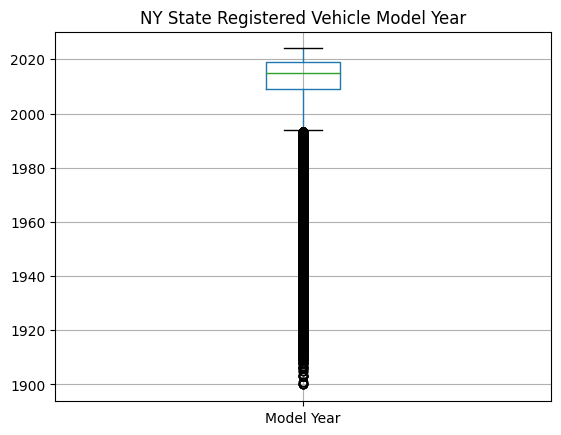

In [28]:
ax = nydmvDf.boxplot(column="Model Year")
_ = ax.set_title("NY State Registered Vehicle Model Year")

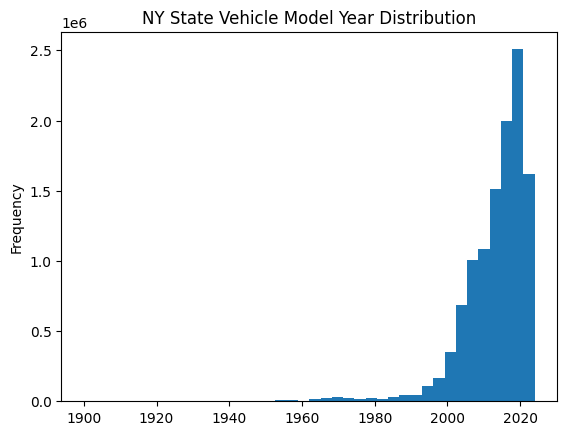

In [29]:
_ = nydmvDf["Model Year"].plot.hist(bins=40,title="NY State Vehicle Model Year Distribution")

In [30]:
# Vehicle Make 
# accidents harmul events
nysVehMake = pd.DataFrame(nydmvDf["Make"].value_counts().sort_values(ascending=False)).head(20)
nysVehMake.columns = ["TotalVehicles"]
#nysVehMake["Make"] = vehModDf.index.values
#nysVehMake.set_index("Make",inplace=True)
totalNYVeh = len(nydmvDf)
nysVehMake.loc["Others"] = [totalNYVeh - nysVehMake["TotalVehicles"].sum()]
nysVehMake

,TotalVehicles
TOYOT,1287162
HONDA,1237490
CHEVR,1198927
FORD,1184186
NISSA,687168
JEEP,609702
SUBAR,510668
HYUND,412515
DODGE,312955
BMW,291507


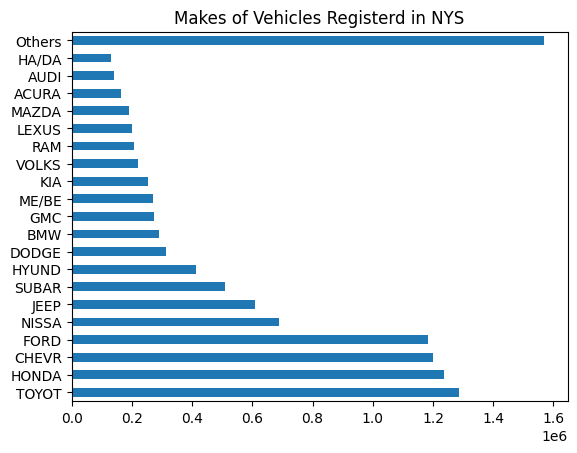

In [31]:
ax = nysVehMake["TotalVehicles"].plot.barh(title = "Makes of Vehicles Registerd in NYS")
#nysVehMake["TotalVehicles"]

In [32]:
#nydmvDf["VIN"].to_csv("tmp/NYDMV-VIN.csv")